In [146]:
#importing Keras, Library for deep learning 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import  img_to_array
from keras import backend as K
# Fix for Issue - #3 https://github.com/shreyans29/thesemicolon/issues/3
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np


In [66]:
# Image manipulations and arranging data
import os
from PIL import Image
import theano
theano.config.optimizer="None"
#Sklearn to modify the data

from sklearn.cross_validation import train_test_split
os.chdir("C:\\Users\\praveenprajapati\\Untitled Folder 10");

In [67]:
# input image dimensions
m,n = 50,50

path1="input";
path2="data";

classes=os.listdir(path2)
x=[]
y=[]
for fol in classes:
    print(fol)
    imgfiles=os.listdir(path2+'\\'+fol);
    for img in imgfiles:
        im=Image.open(path2+'\\'+fol+'\\'+img);
        im=im.convert(mode='RGB')
        imrs=im.resize((m,n))
        imrs=img_to_array(imrs)/255;
        imrs=imrs.transpose(2,0,1);
        imrs=imrs.reshape(3,m,n);
        x.append(imrs)
        if img[0]=='c':
            y.append('cat')
        else :
            y.append('dog') 
            
        

train


In [68]:

x=np.array(x);
y=np.array(y);

In [69]:
y


array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [70]:
x[0].shape


(3, 50, 50)

In [144]:
X_train, Y_train = image_preloader(x, image_shape=(50,50),mode='file', categorical_labels=True,normalize=True)

NameError: name 'image_preloader' is not defined

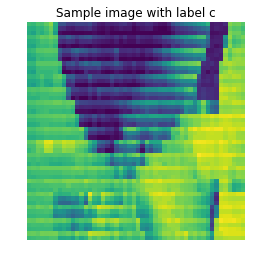

In [154]:
plt.imshow(x[0][0])
plt.axis('off')
plt.title('Sample image with label {}'.format(y[0][0]))
plt.show()


In [ ]:
x[0][0][1]

In [ ]:
x[0][0][2]

In [ ]:
#Convert train datset to (num_images, img_rows, img_cols) format 
#print(x[0].shape)
#for i in range(0,3):
    #plt.subplot(330 + (i+1))
   # plt.imshow(x[0][i], cmap=plt.get_cmap('gray'))
  #  plt.title(x[0][i]);
    
    

In [92]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=4)

In [94]:
nb_classes=2

In [96]:
uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)


In [98]:
model= Sequential()
model.add(Convolution2D(nb_filters,nb_conv,nb_conv,border_mode='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'));
model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));
model.add(Dropout(0.5));
model.add(Flatten());
model.add(Dense(128));
model.add(Dropout(0.5));
model.add(Dense(nb_classes));
model.add(Activation('softmax'));
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

C:\Users\praveenprajapati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 50, 50..., padding="same")`
  
C:\Users\praveenprajapati\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.


In [99]:
nb_epoch=5;
batch_size=5;
model.fit(x_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(x_test, Y_test))


C:\Users\praveenprajapati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 2852s 143ms/step - loss: 0.7061 - acc: 0.5167 - val_loss: 0.6815 - val_acc: 0.5826
Epoch 2/5
20000/20000 [==============================] - 4724s 236ms/step - loss: 0.6908 - acc: 0.5418 - val_loss: 0.6689 - val_acc: 0.5508
Epoch 3/5
20000/20000 [==============================] - 2432s 122ms/step - loss: 0.6856 - acc: 0.5496 - val_loss: 0.6500 - val_acc: 0.6108
Epoch 4/5
20000/20000 [==============================] - 26281s 1s/step - loss: 0.6819 - acc: 0.5671 - val_loss: 0.6523 - val_acc: 0.5894
Epoch 5/5
20000/20000 [==============================] - 3854s 193ms/step - loss: 0.6762 - acc: 0.5807 - val_loss: 0.6474 - val_acc: 0.6036


In [151]:


files=os.listdir(path1);
x=[]
for img in files:
    print(img)
    im = Image.open(path1 + '\\'+img);
    imrs = im.resize((m,n))
    imrs=img_to_array(imrs)/255;
    imrs=imrs.transpose(2,0,1);
    imrs=imrs.reshape(3,m,n);
    x.append(imrs)

10200.jpg
11.jpg
23.jpg
31.jpg
35.jpg


In [133]:
x=np.array(x);
predictions = model.predict(x)

In [152]:
print(x[0])

[[[0.5764706  0.5647059  0.6039216  ... 0.654902   0.65882355 0.61960787]
  [0.53333336 0.5254902  0.5568628  ... 0.6156863  0.61960787 0.5803922 ]
  [0.5176471  0.4862745  0.5568628  ... 0.6509804  0.654902   0.6156863 ]
  ...
  [0.5568628  0.5647059  0.5686275  ... 0.8        0.7882353  0.7647059 ]
  [0.6431373  0.64705884 0.63529414 ... 0.8        0.8        0.7921569 ]
  [0.57254905 0.5764706  0.5921569  ... 0.7490196  0.7490196  0.7411765 ]]

 [[0.5568628  0.56078434 0.5686275  ... 0.7882353  0.7882353  0.78039217]
  [0.64705884 0.64705884 0.654902   ... 0.7607843  0.75686276 0.78431374]
  [0.5764706  0.5764706  0.58431375 ... 0.70980394 0.7058824  0.73333335]
  ...
  [0.58431375 0.5921569  0.5921569  ... 0.7176471  0.7254902  0.7294118 ]
  [0.59607846 0.59607846 0.6        ... 0.73333335 0.74509805 0.7490196 ]
  [0.67058825 0.654902   0.6784314  ... 0.80784315 0.78431374 0.8       ]]

 [[0.58431375 0.5921569  0.5921569  ... 0.7607843  0.7490196  0.7647059 ]
  [0.59607846 0.596078

In [134]:
print(predictions)

[[0.55782396 0.44217604]
 [0.58490163 0.41509834]
 [0.5414636  0.45853642]
 [0.57111615 0.42888382]
 [0.54964453 0.45035547]]


In [139]:
model.save('Untitled Folder 10')